### Importing Required Libraries

In [1]:
# Importing required libraries
import os
import pandas as pd
import numpy as np
import re

# NLTK libraries for text cleaning
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Visualisation Libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
py.offline.init_notebook_mode(connected = True)

# Term-document Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vader Sentiment for classification of Sentiments
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

# Gensim for LDA modelling
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim

# For counting frequency
from collections import Counter

# Parsing Html
from bs4 import BeautifulSoup as bs

# For warnings
import warnings
warnings.filterwarnings('ignore')


### Functions used

#### Contraction Mappings

In [2]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

* Creating preprocess function for removing HTML markups, punctuations, expanding contractions, removing extra spaces and converting the text to lower case

In [3]:
def preprocess1(text,remove_html= True, expand_contarctions = True, lower_case = True, remove_puctuations = True , extra_spaces = True):
    ''' Removing Html markups, Expanding contractions, converting to lower case, removing punctuations and removing extra spaces'''
    
    from bs4 import BeautifulSoup as bs
    import string
    import re
    #1) Removing html markups
    if remove_html == True :
        soup = bs(text,'lxml')
        souped = soup.get_text()
        #print("HTML markup removed from the text.\n")
    else:
        souped = text
       # print("HTML markup not removed from the text.\n")
    
    #2) Expanding contractions
    if expand_contarctions == True :
        for word in souped.split():
            if word in contractions:
                souped = souped.replace(word,contractions[word])
        #print("Contractions are expanded.\n")
    else:
        souped = souped
        #print("Contractions are not expanded.\n")
    
    #3) Converting to lower case
    if lower_case == True:
        lower_case_text = souped.lower()
    #print("Converted to lower case.\n")
    else:
        lower_case_text = souped
        #print("Not converted to lower case.\n")
    
    #4) Removing puctuations
    if remove_puctuations == True:
        new_text =  re.sub('[\!"#$%&\'()*+,-./:;<=>?@\][\\\^_`{|}~]'," ",lower_case_text)
        #print("Punctuations removed. \n")
    else:
        new_text = lower_case_text
        print("Punctuations were not removed. \n")
    
    #5) Removing extra spaces
    if extra_spaces == True:
        preprocessed_text = re.sub("[\s]+"," ",new_text)
        preprocessed_text = (" ").join(preprocessed_text.split())
        #print("Extra whitespaces removed.\n")
    else: 
        preprocessed_text = new_text
        #print("Extra whitespaces were not removed. \n")
    
    return preprocessed_text
        
        

* Function for removing emojis from the text

In [4]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

* Function for removing accented characters from the text

In [5]:
def remove_accented_characters(text):
    import unicodedata
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    text = re.sub('[\d]','',text)
    return text

* Creating Preprocessing 2 function for Tokenization, Lemmatization, Stopword Removal 

In [6]:
def preprocessing2(text, tokenization = True,lemmatization = True, stopward_removal = True,stemming = False):
    '''
    Convert text to tokens, lemmatize/stemming and stopword removal
    
    '''
    from nltk.tokenize import word_tokenize, sent_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.stem.snowball import SnowballStemmer
    
    #1) Tokennization
    if tokenization == True :
        tokenized_text = word_tokenize(text)
        tokenized_text = [tokens for tokens in tokenized_text if len(tokens)>2]
    else:
        tokenized_text = text
    
    #2) Stopwords removal
    stop_words = stopwords.words('English')
    stop_words = list(set(stop_words).union({'mivi','thundebeats','r','thunder','beats','beat','thunderbeat','thunderbeats','mivithunderbeat','mivithunderbeats'}))
    
    if stopward_removal == True:
        stopword_free_text = [word for word in tokenized_text if word not in stop_words]
    else:
        stopword_free_text = tokenized_text
    
    #3) Lemmatized Text
    if lemmatization == True:
        lemmatize = WordNetLemmatizer()
        lemmatized_text = [lemmatize.lemmatize(word) for word in stopword_free_text]
    else:
        lemmatized_text = stopword_free_text
    
    #4) Stemming
    if (lemmatization == True) and (stemming == True) :
        print("Select either Lemmatization or Stemming but both.")
        stemmed_text = lemmatized_text
    elif (lemmatization == False) and (stemming == True):
        stemmer = SnowballStemmer("english") 
        stemmed_text = [stemmer.stem(t) for t in lemmatized_text]
    elif (lemmatization == False) and (stemming == False):
        stemmed_text = lemmatized_text
    else:
        stemmed_text = lemmatized_text
    return stemmed_text
    

* Function to get Top N words from the whole corpus including bigrams and trigrams

In [7]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

* Sentiment Classifier function

In [8]:
def sentiment_classifier(text,threshold = 0.02):
    classifier = SentimentIntensityAnalyzer()
    score = classifier.polarity_scores(text)
    if score['compound'] > threshold :
        text_sentiment = "Positive"
        sentiment_score = score['pos']
    elif score['compound'] < -(threshold):
        text_sentiment = "Negative"
        sentiment_score = score['neg']
    else:
        text_sentiment = "Neutral"
        sentiment_score = score['neu']
    
    
    return text_sentiment

* Function to calculate the score of each Sentiment

In [9]:
def sentiment_score(text):
    classifier = SentimentIntensityAnalyzer()
    score = classifier.polarity_scores(text)
    if score['compound'] >0.02 :
        text_sentiment = "Positive"
        sentiment_score = score['compound']
    elif score['compound'] < -0.02:
        text_sentiment = "Negative"
        sentiment_score = score['compound']
    else:
        text_sentiment = "Neutral"
        sentiment_score = score['compound']
    
    return sentiment_score
    

* Function to create Barchart for Sentiment Percentage in the whole data

In [10]:
def sentiment_percentage_plot(data):
    ''' 
    Plotting Sentiment percentage in al the reviews
    '''
    percentage_review = pd.DataFrame(data['vader sentiment'].value_counts()/1430)
    percentage_review.reset_index(inplace=True)
    percentage_review
    x = percentage_review['index'] 
    y = percentage_review['vader sentiment']

    # Use textposition='auto' for direct text
    data=[go.Bar(
                x=x, y=y,
                texttemplate="%{y:.2%}",
                textposition='outside',hovertemplate='%{x} ' + 'Reviews : %{y:.2%}<extra></extra>'
    )]
    layout=go.Layout(
    title = "Percentage of Sentiments in the Corpus",
    yaxis= dict(
        title = "Percentage",
    ),
    xaxis = dict(
        title = "Sentiment"
    

    ))
    
    fig = go.Figure(data,layout)
    
    fig.write_html("sentiment_percentage_plot.html")
    return fig.show()

* Function to print Top N reviews given their sentiment

In [11]:
def top_n_reviews(n,Review_type = 'Positive'):
    '''
    Prints the top N positive or negative reviews from the corpus
    '''
    if Review_type == 'Positive':
        positive_reviews =review_data[review_data['vader sentiment'] == 'Positive'][['Reviews','sentiment score','Ratings','Date']]
        positive_reviews = positive_reviews.sort_values(by=['sentiment score'],ascending = False)
        positive_reviews = positive_reviews.reset_index(drop=True)
        positive_reviews

        for i in range(n):
            dated = positive_reviews['Date'][i]
            rated = positive_reviews['Ratings'][i]            
            cleaned_review_text = re.sub("[\n]","",positive_reviews['Reviews'][i])

            print('Review {}, Date: {}, Rating: {}\n'.format(i+1,dated,rated))
            print(cleaned_review_text+'\n')
            print('*'*170)
            print('\n')
            
    elif Review_type == 'Negative':
        negative_reviews =review_data[review_data['vader sentiment'] == 'Negative'][['Reviews','sentiment score','Ratings','Date']]
        negative_reviews = negative_reviews.sort_values(by=['sentiment score'],ascending = False)
        negative_reviews.reset_index(drop=True,inplace=True)
        negative_reviews

        for i in range(n):
            dated = negative_reviews['Date'][i]
            rated = negative_reviews['Ratings'][i]
            cleaned_review_text = re.sub("[\n]","",negative_reviews['Reviews'][i])

            print('Review {}, Date: {}, Rating: {}\n'.format(i+1,dated,rated))
            print(cleaned_review_text+'\n')
            print('*'*170)
            print('\n')
    else:
        print('ERROR : Please provide right sentiment.')

* Function to wordcloud for the given sentiment

In [12]:
def wordcloud_sentiment(data,Sentiment= 'Positive'):
    '''
    Plotting Word Clouds for Positive, Negative and Neutral Sentences
    '''
    #1) Positive Sentiments
    if Sentiment == 'Positive':
    
        data_positive = review_data[review_data['vader sentiment']=='Positive']['cleaned tokens']
        all_positive_words = []
        for words in data_positive :
            all_positive_words = all_positive_words + words
        # create a word frequency dictionary
        wordfreq = Counter(all_positive_words)
        # draw a Word Cloud with word frequencies
        wordcloud = WordCloud(width=900,
                          height=500,
                          max_words=100,
                          max_font_size=100,
                          relative_scaling=0.5,
                          colormap='Blues',
                          normalize_plurals=True).generate_from_frequencies(wordfreq)
    #2) Negative Sentiments
    elif Sentiment == 'Negative':
        data_negative = review_data[review_data['vader sentiment']=='Negative']['cleaned tokens']
        all_negative_words = []
        for words in data_negative :
            all_negative_words = all_negative_words + words
        # create a word frequency dictionary
        wordfreq = Counter(all_negative_words)
        # draw a Word Cloud with word frequencies
        wordcloud = WordCloud(width=900,
                          height=500,
                          max_words=100,
                          max_font_size=100,
                          relative_scaling=0.5,
                          colormap='Blues',
                          normalize_plurals=True).generate_from_frequencies(wordfreq)    
    
    #3) Neutral Sentiments
    elif Sentiment == 'Neutral':
        data_negative = review_data[review_data['vader sentiment']=='Negative']['cleaned tokens']
        all_negative_words = []
        for words in data_negative :
            all_negative_words = all_negative_words + words
        # create a word frequency dictionary
        wordfreq = Counter(all_negative_words)
        # draw a Word Cloud with word frequencies
        wordcloud = WordCloud(width=900,
                          height=500,
                          max_words=100,
                          max_font_size=100,
                          relative_scaling=0.5,
                          colormap='Blues',
                          normalize_plurals=True).generate_from_frequencies(wordfreq)  
    
    else:
        print("Error : Please select the correct sentiment.")
    plt.figure(figsize=(17,14))
    plt.title("WordCloud for {} Sentiments".format(Sentiment))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('Word cloud for {} sentiment.png'.format(Sentiment))
    return plt.show()

* Function to create a Time series plot for number of reviews on each date

In [13]:
def number_reviews_on_each_date_plot(data):
    
    '''
    Plotting number of reviews on each date.
    '''
    
    
    datewise_data = data.groupby(by=['Date']).count()
    datewise_data.reset_index(inplace=True)
    datewise_data = datewise_data[['Date','Reviews']]


    fig = px.line(datewise_data, x='Date', y='Reviews', title='Time series plot for number of reviews on each date')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.write_html("Time series plot for number of reviews on each date.html")
    return fig.show()

### Loading the reviews csv file

In [14]:
review_data = pd.read_csv(r'C:\Users\shaan\Documents\Python Scripts\Python\Amazon Reviews\Amazon_Reviews.csv',sep=',')

In [15]:
review_data.head()

,User Name,Ratings,Mini Review,Date,Reviews
0,SAIFUDDIN MOLLA,1.0 out of 5 stars,\nBluetooth doesn't work\n,7 October 2019,\nMivi thunder beats doesn't connect to my pho...
1,Monalisha goswami,5.0 out of 5 stars,\nA very goog product in a great price.\n,8 October 2019,\nI am just afraid of buying this product as s...
2,sandeep reddy a,5.0 out of 5 stars,\nValue for money wireless earphones!!\n,7 October 2019,"\nI got these ThunderBeats for Rs.999, At this..."
3,Steffin painel,5.0 out of 5 stars,"\nOne of the best at this price range, magneti...",5 October 2019,\nPurchased mivi thundebeats in the amazon sal...
4,Unwrap Impulse,4.0 out of 5 stars,\nBang for the buck! | Value for money.\n,24 October 2019,\nI purchased the Mivi Thunderbeats during the...


In [16]:
review_data.shape

(1430, 5)

In [ ]:
review_data.drop_duplicates(keep='first',inplace=True)

In [ ]:
review_data.shape

In [17]:
review_data['Ratings']=review_data['Ratings'].apply(lambda x:int(x[0])) 

In [18]:
review_data['Date']= pd.to_datetime(review_data['Date'])

In [19]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 5 columns):
User Name      1430 non-null object
Ratings        1430 non-null int64
Mini Review    1430 non-null object
Date           1430 non-null datetime64[ns]
Reviews        1430 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 56.0+ KB


### Data Cleaning

* Applying Preprocess1 function

In [20]:
review_data['Preprocessed_reviews'] = review_data['Reviews'].apply(func = preprocess1)

* Removing emoji from the text

In [21]:
review_data['Preprocessed_reviews'] = review_data['Preprocessed_reviews'].apply(remove_emoji)

* Removing accented characters from the test

In [22]:
review_data['Preprocessed_reviews'] = review_data['Preprocessed_reviews'].apply(remove_accented_characters)

* Applying preprocess to Mini Reviews column

In [23]:
review_data['Preprocessed_mini_reviews'] = review_data['Mini Review'].apply(func = preprocess1)

* Checking the shape of data

In [24]:
review_data.shape

(1430, 7)

* Checking the original review and preprocessed review

In [25]:
print("Original Review\n"+review_data["Mini Review"][0])
print("*"*125)
print("Preprocessed Review\n"+review_data["Preprocessed_mini_reviews"][0])

Original Review

Bluetooth doesn't work

*****************************************************************************************************************************
Preprocessed Review
bluetooth does not work


#### Time series plot for number of  reviews on each date

In [26]:
number_reviews_on_each_date_plot(review_data)

* Here we can see that there were a rise in number of reviews from October 5, 2019 to November 9, 2019. A reason for this that there were two major festivals in India - Dussehra and Diwali during this period and people buy lots of things as there were a sale going on Amazon.in during this period.

* Number of reviews also rose for the month of December 2019 and January 2020 as there was an End of Season/ Christmas sale and New Year Sale on Amazon.in

Here I am creating a new field for word count in each review

In [27]:
review_data['word counts'] = review_data["Preprocessed_reviews"].apply(lambda x : len(x.split()))

Here I am removing the space between the word coming after the word "not" in a text.
  For example -  "This is not good" will become "This is notgood".
  I am doing it so that it is considered as a single term.

In [28]:
review_data['Preprocessed_reviews']=review_data['Preprocessed_reviews'].apply(lambda x:re.sub("not[\s]+","not",x))

* Changing the word "worling" to "working"

In [29]:
review_data['Preprocessed_reviews']=review_data['Preprocessed_reviews'].apply(lambda x:re.sub("worling","working",x))

Let's view are data

In [30]:
review_data

,User Name,Ratings,Mini Review,Date,Reviews,Preprocessed_reviews,Preprocessed_mini_reviews,word counts
0,SAIFUDDIN MOLLA,1,\nBluetooth doesn't work\n,2019-10-07,\nMivi thunder beats doesn't connect to my pho...,mivi thunder beats does notconnect to my phone...,bluetooth does not work,67
1,Monalisha goswami,5,\nA very goog product in a great price.\n,2019-10-08,\nI am just afraid of buying this product as s...,i am just afraid of buying this product as som...,a very goog product in a great price,47
2,sandeep reddy a,5,\nValue for money wireless earphones!!\n,2019-10-07,"\nI got these ThunderBeats for Rs.999, At this...",i got these thunderbeats for rs at this price...,value for money wireless earphones,151
3,Steffin painel,5,"\nOne of the best at this price range, magneti...",2019-10-05,\nPurchased mivi thundebeats in the amazon sal...,purchased mivi thundebeats in the amazon sale ...,one of the best at this price range magnetic e...,49
4,Unwrap Impulse,4,\nBang for the buck! | Value for money.\n,2019-10-24,\nI purchased the Mivi Thunderbeats during the...,i purchased the mivi thunderbeats during the s...,bang for the buck value for money,233
...,...,...,...,...,...,...,...,...
1425,JPG,5,\nGood in terms of bass\n,2020-01-23,\nIt is slightly heavy\n,it is slightly heavy,good in terms of bass,4
1426,Pulkit saini,1,\nWorst product\n,2019-10-14,\nIt's bluetooh is not worling\n,it s bluetooh is notworking,worst product,6
1427,Amit Bishnoi,5,\nNice quality\n,2020-02-01,\nSound is very nice\n,sound is very nice,nice quality,4
1428,uvesh khan,5,\nFive\n,2019-11-30,\nThis is awesome guy's\n,this is awesome guy s,five,5


Ploting the distribution of word counts in the reviews

In [31]:
x = review_data['word counts']

layout = go.Layout(
    title = "Word Count distribution",
    yaxis= dict(
        title = "Counts of reviews"
    ),
    xaxis = dict(
        title = "Word Counts"

    ),
        hoverlabel_align = 'right'
)
trace1 = go.Histogram(x=x,hovertemplate='Reviews Count : %{y} <br> Word Counts : %{x}<extra></extra>',)
fig = go.Figure(data = [trace1],layout = layout)
py.offline.iplot(fig)

Clearly, the distribution is left-skewed and the majority of the reviews were having a word count of 45-50 words.

* Applying preprocessing2 function to Tokenize,Lemmatize and remove stopwords from the text.

In [32]:
review_data['cleaned tokens'] = review_data['Preprocessed_reviews'].apply(preprocessing2)

In [33]:
review_data['cleaned tokens mini reviews'] = review_data['Preprocessed_mini_reviews'].apply(preprocessing2)

In [34]:
review_data['final review'] =[' '.join(word) for word in review_data['cleaned tokens']]

In [35]:
review_data['final mini review'] =[' '.join(word) for word in review_data['cleaned tokens mini reviews']]
review_data['final mini review'] = review_data['final mini review'].apply(lambda x : re.sub('goog','good',x))

* Applying countvectorizer to the final cleaned review to get the Term - Document Matrix

In [36]:
cv = CountVectorizer(ngram_range=(1,5),)
cvtrain = cv.fit(review_data['final review'])
cvtransformed = cv.transform(review_data['final review'])

In [37]:
Dense_mat = cvtransformed.todense()
TDM = pd.DataFrame(Dense_mat, columns=cvtrain.get_feature_names())
TDM.shape
TDM.head()

,aata,aata please,aata please fix,aata please fix possible,aata please fix possible coz,able,able hear,able hear voice,able hear voice clearly,able hear voice clearly want,...,zero cant able use,zero cant able use continuously,zero noise,zero noise cancellation,zero noise cancellation fact,zero noise cancellation fact best,zero qualm,zero qualm connectivity,zero qualm connectivity sound,zero qualm connectivity sound quality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's have a look at the top 100 words and their frequencies

In [38]:
words, word_values = get_top_n_words(n_top_words=100,
                                     count_vectorizer=cv, 
                                     text_data=review_data['final review'])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


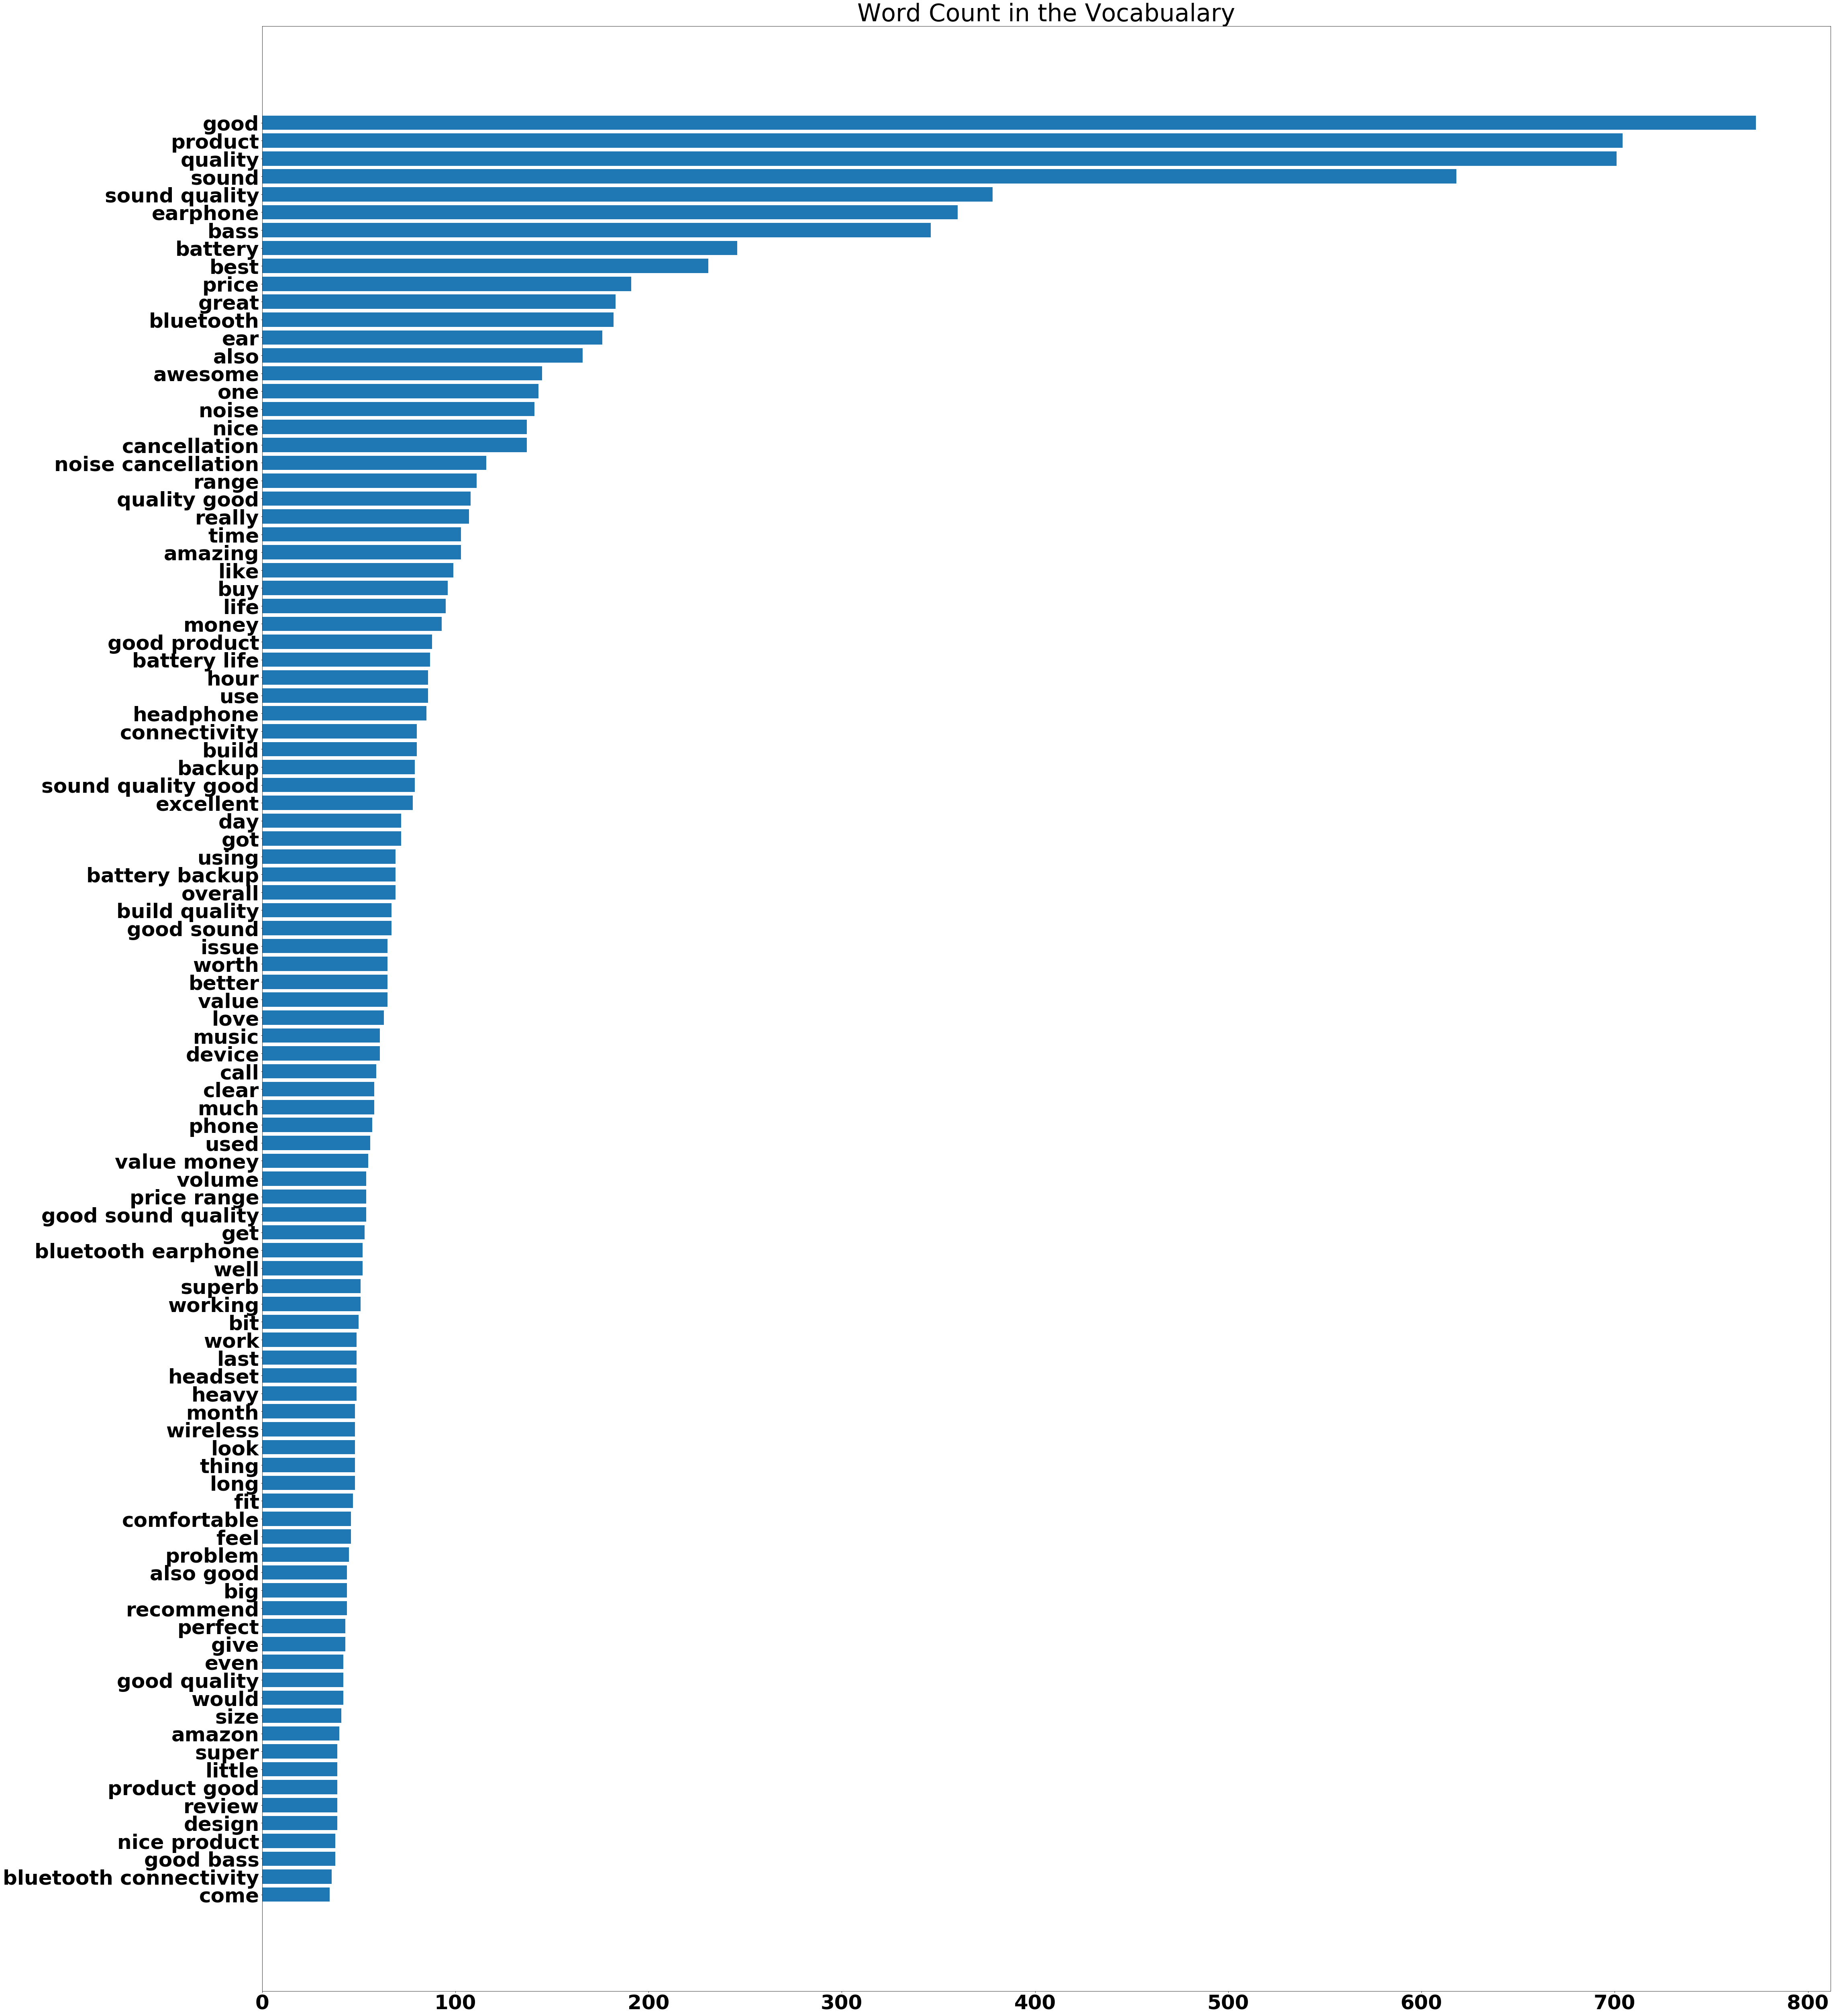

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,90))
plt.barh(words, word_values)
plt.title("Word Count in the Vocabualary")
plt.gca().invert_yaxis()
plt.savefig('word_counts.png')
plt.show()

* The top words having frequencies more than 200 are : good, product, quality, sound, sound quality, base, battery, best
* We can notice some positive words like - sound quality good, good sound quality, product good, good bass, comfortable, superb working, value money
* We can see some negative words like - heavy and issue
* As we can see more number of positive words in the Top 100 words, I am hopig that overall there positive reviews about the product

#### Applying Vader Sentiment Classifier to our cleaned Reviews and cleaned Mini Reviews

In [40]:
review_data['vader sentiment']= review_data['final review'].apply(sentiment_classifier)

In [41]:
review_data['sentiment score']= review_data['final review'].apply(sentiment_score)

In [42]:
review_data['vader sentiment mini reviews'] = review_data['final mini review'].apply(sentiment_classifier)

Looking at the final data with sentiment and sentiment scores

In [43]:
review_data

,User Name,Ratings,Mini Review,Date,Reviews,Preprocessed_reviews,Preprocessed_mini_reviews,word counts,cleaned tokens,cleaned tokens mini reviews,final review,final mini review,vader sentiment,sentiment score,vader sentiment mini reviews
0,SAIFUDDIN MOLLA,1,\nBluetooth doesn't work\n,2019-10-07,\nMivi thunder beats doesn't connect to my pho...,mivi thunder beats does notconnect to my phone...,bluetooth does not work,67,"[notconnect, phone, phone, model, redmi, note,...","[bluetooth, work]",notconnect phone phone model redmi note althou...,bluetooth work,Negative,-0.6369,Neutral
1,Monalisha goswami,5,\nA very goog product in a great price.\n,2019-10-08,\nI am just afraid of buying this product as s...,i am just afraid of buying this product as som...,a very goog product in a great price,47,"[afraid, buying, product, people, disappointed...","[goog, product, great, price]",afraid buying product people disappointed revi...,good product great price,Negative,-0.0534,Positive
2,sandeep reddy a,5,\nValue for money wireless earphones!!\n,2019-10-07,"\nI got these ThunderBeats for Rs.999, At this...",i got these thunderbeats for rs at this price...,value for money wireless earphones,151,"[got, price, point, best, wireless, earphone, ...","[value, money, wireless, earphone]",got price point best wireless earphone gave ho...,value money wireless earphone,Positive,0.9690,Positive
3,Steffin painel,5,"\nOne of the best at this price range, magneti...",2019-10-05,\nPurchased mivi thundebeats in the amazon sal...,purchased mivi thundebeats in the amazon sale ...,one of the best at this price range magnetic e...,49,"[purchased, amazon, sale, totally, worth, pric...","[one, best, price, range, magnetic, ear, tip, ...",purchased amazon sale totally worth price look...,one best price range magnetic ear tip add,Positive,0.9728,Positive
4,Unwrap Impulse,4,\nBang for the buck! | Value for money.\n,2019-10-24,\nI purchased the Mivi Thunderbeats during the...,i purchased the mivi thunderbeats during the s...,bang for the buck value for money,233,"[purchased, sale, making, incredible, deal, us...","[bang, buck, value, money]",purchased sale making incredible deal used alm...,bang buck value money,Positive,0.9941,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,JPG,5,\nGood in terms of bass\n,2020-01-23,\nIt is slightly heavy\n,it is slightly heavy,good in terms of bass,4,"[slightly, heavy]","[good, term, bass]",slightly heavy,good term bass,Neutral,0.0000,Positive
1426,Pulkit saini,1,\nWorst product\n,2019-10-14,\nIt's bluetooh is not worling\n,it s bluetooh is notworking,worst product,6,"[bluetooh, notworking]","[worst, product]",bluetooh notworking,worst product,Neutral,0.0000,Negative
1427,Amit Bishnoi,5,\nNice quality\n,2020-02-01,\nSound is very nice\n,sound is very nice,nice quality,4,"[sound, nice]","[nice, quality]",sound nice,nice quality,Positive,0.4215,Positive
1428,uvesh khan,5,\nFive\n,2019-11-30,\nThis is awesome guy's\n,this is awesome guy s,five,5,"[awesome, guy]",[five],awesome guy,five,Positive,0.6249,Neutral


* Making a Pickle file for the data

In [44]:
review_data.to_pickle("cleaned_data.pkl")

#### Percentage plot of sentiments in our reviews

In [45]:
sentiment_percentage_plot(review_data)

* As assumed after viewing the top 100 words, there are 80.35% of Positive reviews, 10.98% of Negative reviews and 8.67% of Neutral reviews.

I also applied the sentiment classifier to cleaned Mini Reviews to see if there is any discrepancy in classification of Review sentiments

In [46]:
review_data['vader sentiment mini reviews'].value_counts()/1430

Positive    0.660140
Neutral     0.244755
Negative    0.095105
Name: vader sentiment mini reviews, dtype: float64

* 66.01% were Positive, 24.5% were Neutral and 9.5% wer Negative

There were some discrepancy in classification of sentiments of Mini Reviews and Review, I created a mismatch data frame to further analyse it. I think we can remove this discrepancy by changing the threshold value of the classifier

In [47]:
mismatched_sentiments = review_data[review_data['vader sentiment']!= review_data['vader sentiment mini reviews']][['Preprocessed_reviews','Preprocessed_mini_reviews','vader sentiment','vader sentiment mini reviews']]

In [48]:
mismatched_sentiments= mismatched_sentiments.reset_index(drop=True)
mismatched_sentiments.shape

(426, 4)

In [49]:
for i in range(len(mismatched_sentiments)):
    print("Review {}".format(i+1))
    print('Mini Review : ' + mismatched_sentiments['Preprocessed_mini_reviews'][i] +'\n' 'Sentiment = {}'.format(mismatched_sentiments['vader sentiment mini reviews'][i]))
    print('*'*100)
    print('Review : ' + mismatched_sentiments['Preprocessed_reviews'][i] +'\n' 'Sentiment = {}'.format(mismatched_sentiments['vader sentiment'][i]))
    print('*'*150)
    

Review 1
Mini Review : bluetooth does not work
Sentiment = Neutral
****************************************************************************************************
Review : mivi thunder beats does notconnect to my phone my phone model is redmi note  although i ordered one of these earlier and that product does notconnect to my phone at the time i thought that it was defective so i replaced the first order after getting this product the same problem still happens so i request to me please call me and solve this problem
Sentiment = Negative
******************************************************************************************************************************************************
Review 2
Mini Review : a very goog product in a great price
Sentiment = Positive
****************************************************************************************************
Review : i am just afraid of buying this product as some peoples are disappointed in reviews but after using it i am j

****************************************************************************************************
Review : value worth product
Sentiment = Positive
******************************************************************************************************************************************************
Review 338
Mini Review : awesome audio quality
Sentiment = Positive
****************************************************************************************************
Review : goo
Sentiment = Neutral
******************************************************************************************************************************************************
Review 339
Mini Review : must buy
Sentiment = Neutral
****************************************************************************************************
Review : cool headphone fit perfectly loved the design
Sentiment = Positive
******************************************************************************************************************

* Let's have a look at the Top 10 positive reviews based on their sentiment scores

In [50]:
top_n_reviews(n=10,Review_type='Positive')

Review 1, Date: 2020-01-20 00:00:00, Rating: 5

Mivi Thunderbeats Bluetooth Earphone is one such Bluetooth headset offered by India’s homegrown brand Mivi. It is the company’s top of the line earphone boasting top-notch specs. Well, getting swayed by just looking at the specs-sheet often doesn’t end well. So, let’s see how good this earphone is in real life.Design-wise, the Mivi Thunderbeats earphone comes with a metallic finish and a well-built body. The earphone looks premium, and the texture feels good too.The company has put in a lot of effort to provide an ergonomic design for this earphone, and it did so quite successfully. In addition to multiple sized ear buds, the Thunderbeats also feature ear hooks to keep them tightly fitted into your ear. I must say, these ear hooks really help the earphone fit well. I would also like to explicitly point out that “the earphone fits well” doesn’t necessarily mean “the earphone is comfortable”.Mivi has also thrown in the magnetic locks to kee

* Let's have a look at the Top 10 negative reviews based on their sentiment scores

In [51]:
top_n_reviews(5,Review_type='Negative')

Review 1, Date: 2019-11-09 00:00:00, Rating: 1

This product died in the middle of use and not starting too tried various adapters and cable but still not charging mivi support is the worst they didn't even care to reply back for any help

**************************************************************************************************************************************************************************


Review 2, Date: 2019-12-21 00:00:00, Rating: 2

Not getting fit in the year. Very uncomfortable

**************************************************************************************************************************************************************************


Review 3, Date: 2019-10-15 00:00:00, Rating: 1

The product is not working . Waste of 999 pls make sure tat The product works after tat u can sell this

********************************************************************************************************************************************************************

### Topic Modelling

* Function to convert our Documnet-Term matrix to the input matrix required for Gensim

In [52]:
def vect2gensim(corpus_vect,vect):
     # transform sparse matrix into gensim corpus and dictionary
    corpus_vect_gensim = gensim.matutils.Sparse2Corpus(corpus_vect, documents_columns=False)
    dictionary = Dictionary.from_corpus(corpus_vect_gensim,
                                    id2word=dict((id, word) for word, id in vect.vocabulary_.items()))

    return (corpus_vect_gensim, dictionary)

* Function to select the appropriate number of topics for LDA Models by computing c_v coherence value

In [53]:
def compute_coherence_values(id2word, corpus, texts, limit, start=2,step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    num_topic = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        num_topic.append(num_topics)
        coherence_values.append(coherencemodel.get_coherence())

    return  pd.DataFrame({"Num_Topics":num_topic,"Coherence Value":coherence_values})


* Function to create bigrams and trigrams

In [54]:
def make_trigrams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(texts, min_count=5, threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

* Function to save the Visualisation plot for LDA topics to HTML

In [55]:
def saving_to_html(model,corpus,id2word,filename):
    data = pyLDAvis.gensim.prepare(model, corpus, id2word)
    pyLDAvis.save_html(data, filename)

#### Making an LDA model for the whole corpus

In [56]:
corpus,dictionary = vect2gensim(cvtransformed,cvtrain)

In [57]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary,passes=20)

In [58]:
ldamodel.save("lda_model")

In [59]:
ldamodel.show_topics()

[(0,
  '0.008*"product" + 0.005*"good" + 0.005*"quality" + 0.005*"sound" + 0.004*"bass" + 0.002*"earphone" + 0.002*"sound quality" + 0.002*"battery" + 0.001*"nice" + 0.001*"noise"'),
 (1,
  '0.004*"quality" + 0.003*"good" + 0.003*"product" + 0.003*"sound" + 0.003*"earphone" + 0.002*"sound quality" + 0.002*"ear" + 0.002*"battery" + 0.002*"bass" + 0.002*"price"'),
 (2,
  '0.008*"product" + 0.005*"quality" + 0.004*"sound" + 0.003*"earphone" + 0.003*"best" + 0.003*"money" + 0.002*"value" + 0.002*"great" + 0.002*"bass" + 0.002*"value money"'),
 (3,
  '0.003*"product" + 0.003*"earphone" + 0.003*"good" + 0.003*"sound" + 0.003*"quality" + 0.002*"ear" + 0.002*"sound quality" + 0.002*"bluetooth" + 0.002*"also" + 0.002*"battery"'),
 (4,
  '0.005*"good" + 0.005*"quality" + 0.003*"sound" + 0.003*"earphone" + 0.002*"sound quality" + 0.002*"product" + 0.002*"ear" + 0.002*"bluetooth" + 0.002*"great" + 0.001*"bass"'),
 (5,
  '0.007*"quality" + 0.006*"good" + 0.006*"sound" + 0.005*"product" + 0.004*"sou

In [60]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.138355  0.098894       1        1  15.294407
4      0.118739  0.116193       2        1  12.931834
9     -0.022451 -0.072105       3        1  11.619306
0     -0.013853 -0.021896       4        1  10.582602
6      0.019391 -0.028402       5        1   9.404889
1      0.024689 -0.034397       6        1   8.855313
7     -0.005095 -0.019628       7        1   8.815245
5     -0.011819  0.000493       8        1   8.273767
3      0.023001 -0.029294       9        1   8.160697
2      0.005754 -0.009858      10        1   6.061943, topic_info=      Category        Freq          Term       Total  loglift  logprob
9      Default  419.000000       product  419.000000  30.0000  30.0000
10622  Default   57.000000  good product   57.000000  29.0000  29.0000
143    Default  479.000000          good  479.000000  28.0000  28.0000
1480   Default   37.000000         value   37.000000  27.0000  27.0000
214    Default  135.000000          best  135.000000  26.0000  26.0000
...        ...         ...           ...         ...      ...      ...
236    Topic10    4.741145     bluetooth  109.244354  -0.3342  -6.8934
212    Topic10    4.711232         price  115.061661  -0.3924  -6.8997
2619   Topic10    3.943727          nice   85.362328  -0.2716  -7.0775
2354   Topic10    3.778303       awesome   89.567047  -0.3626  -7.1204
237    Topic10    3.311918        really   64.014610  -0.1584  -7.2521

[762 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
36020      8  0.599329           achhi
36030      8  0.599329       achhi hai
5461       3  0.545657     active case
15202      9  0.599858  already paired
531        1  0.190027            also
...      ...       ...             ...
1385       6  0.077227           would
1385       7  0.038613           would
1385       8  0.077227           would
1385       9  0.154454           would
31865     10  0.660432           write

[1725 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 10, 1, 7, 2, 8, 6, 4, 3])

* Here, Topics- 1,2,3,4 are not very close to each other and have the save word counts as their areas are same 
* Rest of the topics are overlapping and having approximately same areas
* If we hover around the graph we will get to know the following details about the topics:
* Topic 1 - Is majorly talking about the sound quality and great noise canncellation of the product
* Topic 2 - Is majorly talking about the bass and battery life of the product
* Topic 3 - Talking about sound quality,noise cancellation, good bluetooth connectivity and good bass of the product
* Topic 4 - Is talking about design, battery backup, volume level, good price of the product and recommendation to buy this product
* Topic 5 - Talks about the heavy case, sound and hearing issue of the product and good product for workout
* Topic 6 - Is again talking about how good and comfortable the product is
* Topic 7 - Talks about some issue in product and replacement of it
* Topic 8 - Is talking about the low price of the product, feeling discomfort from product and recieving a defective product
* Topic 9 - Talks about how good the sound and bass quality of the product is and the good size and fit of the product. Also, the good customer support 
* Topic 10 - Talks about the product is good for playing PUBG and watching/listening vides and music on youtube. Also, the sound quality of the product on a call and it is not working on a call


In [61]:
saving_to_html(model = ldamodel, corpus = corpus, id2word = dictionary,filename="Top Words in each topic.html")

#### LDA for Negative Sentiments Only

In [62]:
data_negative = review_data[review_data['vader sentiment']=='Negative']
data_negative = data_negative.reset_index(drop=True)

In [63]:
trigram_reviews_negative = make_trigrams(data_negative['cleaned tokens'])

In [64]:
id2word = Dictionary(trigram_reviews_negative)

In [65]:
texts = trigram_reviews_negative
corpus = [id2word.doc2bow(text) for text in texts]

In [66]:
lda_coherence_negative = compute_coherence_values(id2word=id2word, corpus=corpus, texts=texts, start=2, limit=20, step=1)
lda_coherence_negative = lda_coherence_negative.sort_values(by=['Coherence Value'],ascending=False)
lda_coherence_negative = lda_coherence_negative.reset_index(drop=True)
num_topics_negative = lda_coherence_negative['Num_Topics'][0]

In [67]:
lda_model_negative = LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics_negative, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [68]:
lda_model_negative.save("lda_negative")

In [69]:
lda_model_negative.show_topics(num_topics=num_topics_negative)

[(0,
  '0.059*"back" + 0.040*"money" + 0.034*"support" + 0.033*"day" + 0.026*"warranty" + 0.026*"notworth" + 0.024*"quality" + 0.022*"working" + 0.020*"year" + 0.020*"reply"'),
 (1,
  '0.053*"uncomfortable" + 0.030*"music" + 0.016*"notvery" + 0.016*"goodlow" + 0.001*"bass" + 0.001*"fit" + 0.001*"low" + 0.001*"ear" + 0.001*"feeling" + 0.001*"earpiece"'),
 (2,
  '0.080*"headphone" + 0.060*"low" + 0.049*"battery" + 0.039*"life" + 0.036*"hour" + 0.029*"give" + 0.027*"buying" + 0.022*"drop" + 0.018*"even" + 0.017*"notworth"'),
 (3,
  '0.107*"worst" + 0.076*"notbuy" + 0.039*"connect" + 0.039*"thus" + 0.012*"dont" + 0.012*"buy" + 0.012*"headfones" + 0.012*"dint" + 0.012*"sale" + 0.012*"item"'),
 (4,
  '0.091*"ear" + 0.058*"pain" + 0.047*"earphone" + 0.030*"day" + 0.029*"quality" + 0.019*"also" + 0.018*"got" + 0.018*"worked" + 0.018*"hr" + 0.017*"product"'),
 (5,
  '0.207*"product" + 0.045*"working" + 0.042*"stop" + 0.031*"service" + 0.026*"month" + 0.024*"never" + 0.023*"got" + 0.020*"week" +

In [70]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model_negative, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.117267 -0.024949       1        1  18.366886
7     -0.178095 -0.053589       2        1  13.047022
4     -0.165153 -0.124059       3        1  11.826713
5     -0.158440  0.178855       4        1   7.675943
13    -0.029506  0.078042       5        1   6.517396
2      0.136690  0.050352       6        1   5.813412
9     -0.024672 -0.152666       7        1   5.686616
11     0.023353  0.038513       8        1   5.277619
0     -0.027894  0.076962       9        1   4.616541
6     -0.001337  0.120720      10        1   4.401219
10     0.057691 -0.029956      11        1   3.525519
17     0.010557 -0.003846      12        1   2.510290
14     0.031132 -0.029543      13        1   2.501114
8      0.063060 -0.047153      14        1   2.266852
16     0.065387 -0.071113      15        1   2.067953
18     0.102357 -0.019996      16        1   1.423904
3      0.066535  0.031549      17        1   1.234305
12     0.077247 -0.006727      18        1   0.782240
1      0.068356 -0.011397      19        1   0.458457, topic_info=    Category       Freq          Term      Total  loglift  logprob
16   Default  87.000000       product  87.000000  30.0000   30.000
214  Default  20.000000           bad  20.000000  29.0000   29.000
183  Default  21.000000         worst  21.000000  28.0000   28.000
364  Default  11.000000  connectivity  11.000000  27.0000   27.000
45   Default  30.000000           ear  30.000000  26.0000   26.000
..       ...        ...           ...        ...      ...      ...
333  Topic19   0.011314          keep   1.446537   0.5341   -6.733
10   Topic19   0.011313           one  16.046392  -1.8722   -6.733
336  Topic19   0.011313        magnet   2.143572   0.1408   -6.733
165  Topic19   0.011313         usage   5.132281  -0.7323   -6.733
329  Topic19   0.011313       falling   1.446538   0.5341   -6.733

[865 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
427       5  0.752594   abruptly
168       9  0.782398    adapter
249       8  0.751643        add
24        2  0.466226     afraid
555       9  0.782397       afte
...     ...       ...        ...
393       1  0.897498  worthless
270       5  0.824808      would
270       8  0.206202      would
351       8  0.312465       year
351       9  0.624930       year

[682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 8, 5, 6, 14, 3, 10, 12, 1, 7, 11, 18, 15, 9, 17, 19, 4, 13, 2])

* We used our c_v coherence score function to select the best model with the best number of topics from 2-20 based on their coherence score and we got 19 Topics for this model 
* Here we have used LDA to segment different topics in negative reviews only to see what are the keywords or problem that a company can improve in their products.
* Keywords in all the products are:
    - Painful
    - Charge
    - Damage
    - Volume
    - Uncomfortable
    - Issue with calling
    - Heavy
    - Not working
    - Connectivity issue
    - Defective


In [71]:
saving_to_html(model = lda_model_negative,corpus = corpus, id2word = id2word,filename="Top Negative Words in each topic.html")

#### LDA for Positive Sentiments Only

In [72]:
data_positive = review_data[review_data['vader sentiment']=='Positive']
data_positive= data_positive.reset_index(drop=True)

In [73]:
trigram_reviews = make_trigrams(data_positive['cleaned tokens'])

In [74]:
id2word_positive = Dictionary(trigram_reviews)

In [75]:
texts_positive = trigram_reviews
corpus_positive = [id2word_positive.doc2bow(text) for text in texts_positive]

In [76]:
lda_coherence_positive = compute_coherence_values(id2word=id2word_positive, corpus=corpus_positive, texts=texts_positive, start=2, limit=20, step=1)
lda_coherence_positive = lda_coherence_positive.sort_values(by=['Coherence Value'],ascending=False)
lda_coherence_positive = lda_coherence_positive.reset_index(drop=True)
num_topics_positive = lda_coherence_positive['Num_Topics'][0]

In [77]:
lda_model_positive = LdaModel(corpus=corpus_positive,
                                           id2word=id2word_positive,
                                           num_topics=num_topics_positive, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [78]:
lda_model_positive.save("lda_positive")

In [79]:
lda_model_positive.show_topics(num_topics_positive)

[(0,
  '0.030*"service" + 0.018*"automatically" + 0.017*"review" + 0.017*"issue" + 0.016*"model" + 0.014*"return" + 0.013*"cvc" + 0.013*"properly" + 0.013*"wonderful" + 0.012*"first"'),
 (1,
  '0.027*"money" + 0.021*"purchased" + 0.021*"audio" + 0.019*"new" + 0.015*"effect" + 0.015*"deep" + 0.014*"wow" + 0.011*"always" + 0.009*"worst" + 0.009*"ago"'),
 (2,
  '0.075*"amazing" + 0.019*"every" + 0.019*"comfort" + 0.016*"button" + 0.015*"liked" + 0.014*"impressive" + 0.013*"game" + 0.012*"hear" + 0.012*"multi" + 0.011*"review"'),
 (3,
  '0.036*"ear" + 0.018*"time" + 0.017*"phone" + 0.017*"last" + 0.016*"big" + 0.015*"call" + 0.013*"bit" + 0.013*"month" + 0.013*"year" + 0.013*"size"'),
 (4,
  '0.019*"guy" + 0.019*"notworking" + 0.018*"lovely" + 0.016*"team" + 0.016*"class" + 0.015*"value" + 0.012*"beast" + 0.012*"usually" + 0.011*"assistance" + 0.011*"gently"'),
 (5,
  '0.095*"good" + 0.072*"product" + 0.068*"quality" + 0.067*"sound" + 0.036*"bass" + 0.031*"earphone" + 0.030*"best" + 0.022*

In [80]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model_positive, corpus_positive, id2word_positive)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.409256  0.039766       1        1  62.401337
3      0.012830 -0.290431       2        1  16.191633
2      0.080518  0.070725       3        1   7.127109
0      0.078732  0.069575       4        1   4.464646
1      0.081889  0.038321       5        1   4.278391
6      0.083203  0.044702       6        1   3.338109
4      0.072085  0.027342       7        1   2.198772, topic_info=     Category        Freq        Term       Total  loglift  logprob
63    Default  913.000000        good  913.000000  30.0000  30.0000
66    Default  691.000000     product  691.000000  29.0000  29.0000
38    Default  653.000000     quality  653.000000  28.0000  28.0000
71    Default  644.000000       sound  644.000000  27.0000  27.0000
377   Default   83.000000     amazing   83.000000  26.0000  26.0000
...       ...         ...         ...         ...      ...      ...
2110   Topic7    0.908260         bab    1.846398   3.1078  -5.9167
1845   Topic7    0.820184  tremendous    1.756606   3.0557  -6.0187
496    Topic7    1.223399        dont    3.038116   2.9077  -5.6189
403    Topic7    1.478852        want   27.782026   0.8841  -5.4292
659    Topic7    0.988727   sometimes   10.498444   1.4547  -5.8318

[278 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1664      5  0.689800  according
1925      6  0.760542      added
505       5  0.875858        ago
57        1  0.993006       also
167       5  0.869124     always
...     ...       ...        ...
318       4  0.395780    working
620       5  0.865322      worst
75        1  0.993783      worth
1751      5  0.874445        wow
76        2  0.986373       year

[280 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 1, 2, 7, 5])

* We used our c_v coherence score function to select the best model with the best number of topics from 2-20 based on their coherence score and we got 7 Topics for this model 
* Here we have used LDA to segment different topics in positve reviews only to see what are the keywords or feature liked by the customers.
* Keywords in all the products are:
    - Good Sound
    - Good Bass
    - Value for Money
    - Good noise cancellation
    - Best buy product at this price
    - Great connectivity
    

In [81]:
saving_to_html(model = lda_model_positive,corpus = corpus_positive, id2word = id2word_positive,filename="Top Positive Words in each topic.html")

### Wordcloud for positive reviews

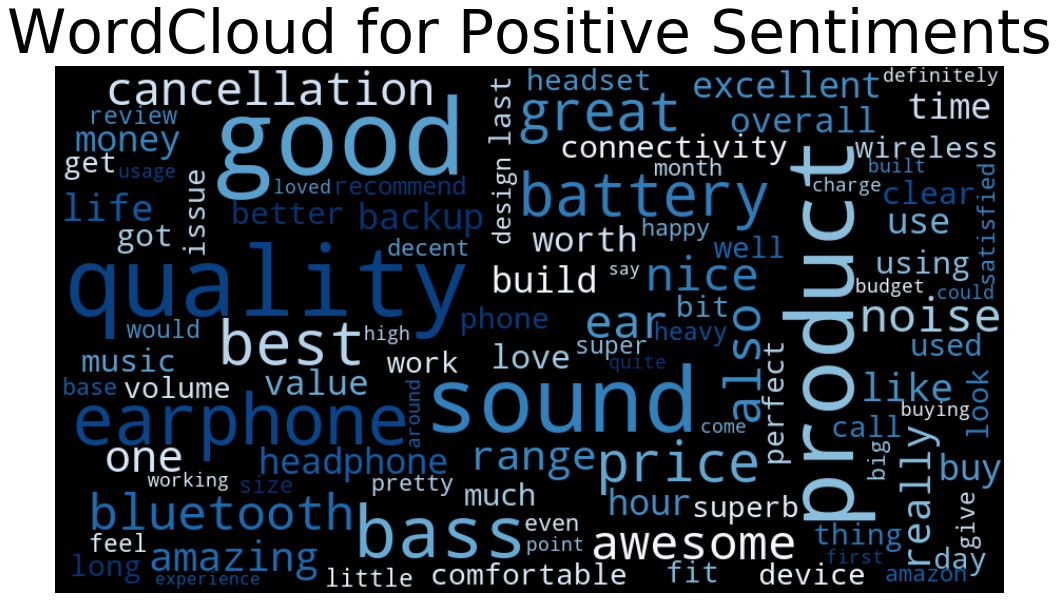

In [82]:
wordcloud_sentiment(review_data,Sentiment='Positive')

- Comfortable
- Good Sound, Bass, Price and Quality
- Noise Cancellation
- Value for money
- Comfortable
- Battery Backup
- Fit
- Super Awesome

### Wordcloud for negative reviews

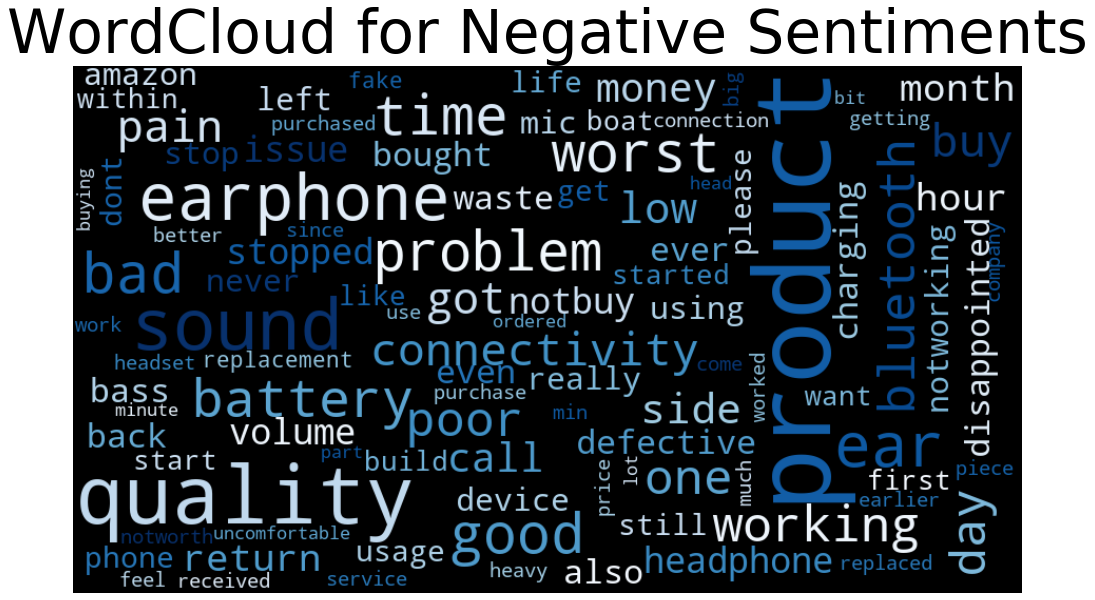

In [83]:
wordcloud_sentiment(review_data,Sentiment='Negative')

- Bad
- Pain
- Not Working
- Uncomfortable
- Not Worth
- Dissapointed
- Replacement
- Issue
- not buy
- defective